<b>Import libaries</b>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<b>Import CSV files</b>

In [37]:
weather_daily = pd.read_csv('weather_daily_darksky.csv')
weather_hourly = pd.read_csv('weather_hourly_darksky.csv')

<b>Work on Hourly data</b>

In [14]:
# Get information about the data
weather_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21165 entries, 2011-11-11 00:00:00 to 2014-02-15 23:00:00
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   visibility           21165 non-null  float64
 1   windBearing          21165 non-null  int64  
 2   temperature          21165 non-null  float64
 3   dewPoint             21165 non-null  float64
 4   pressure             21152 non-null  float64
 5   apparentTemperature  21165 non-null  float64
 6   windSpeed            21165 non-null  float64
 7   precipType           21165 non-null  object 
 8   icon                 21165 non-null  object 
 9   humidity             21165 non-null  float64
 10  summary              21165 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 1.9+ MB


In [4]:
# Get summary statistics for the daily weather data
weather_hourly.describe()

visibility   windBearing   temperature      dewPoint      pressure  \
count  21165.000000  21165.000000  21165.000000  21165.000000  21152.000000   
mean      11.166485    195.685897     10.471486      6.530501   1014.125153   
std        3.099337     90.629453      5.781904      5.041965     11.388337   
min        0.180000      0.000000     -5.640000     -9.980000    975.740000   
25%       10.120000    121.000000      6.470000      2.820000   1007.430000   
50%       12.260000    217.000000      9.930000      6.570000   1014.780000   
75%       13.080000    256.000000     14.310000     10.330000   1022.050000   
max       16.090000    359.000000     32.400000     19.880000   1043.320000   

       apparentTemperature     windSpeed      humidity  
count         21165.000000  21165.000000  21165.000000  
mean              9.230338      3.905215      0.781829  
std               6.940919      2.026854      0.140369  
min              -8.880000      0.040000      0.230000  
25%               3.900000      2.420000      0.700000  
50%               9.360000      3.680000      0.810000  
75%              14.320000      5.070000      0.890000  
max              32.420000     14.800000      1.000000

In [31]:
weather_hourly['time'] = pd.to_datetime(weather_hourly['time'])

# Extract features and save the cleaned data to a new csv file
weather_hourly['date'] = weather_hourly['time'].dt.date
weather_hourly['hour'] = weather_hourly['time'].dt.hour
weather_hourly['day'] = weather_hourly['time'].dt.day
weather_hourly['month'] = weather_hourly['time'].dt.month
weather_hourly['year'] = weather_hourly['time'].dt.year

<b>Seasonality Plots</b>
1. Yearly
2. Monthly
3. Weekly
4. Daily

<h3>Yearly Seasonality</h3>

C:\Users\beast\AppData\Local\Temp\ipykernel_36828\299276342.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\beast\AppData\Local\Temp\ipykernel_36828\299276342.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\beast\AppData\Local\Temp\ipykernel_36828\299276342.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\beast\AppData\Local\Temp\ipykernel_36828\299276342.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklab

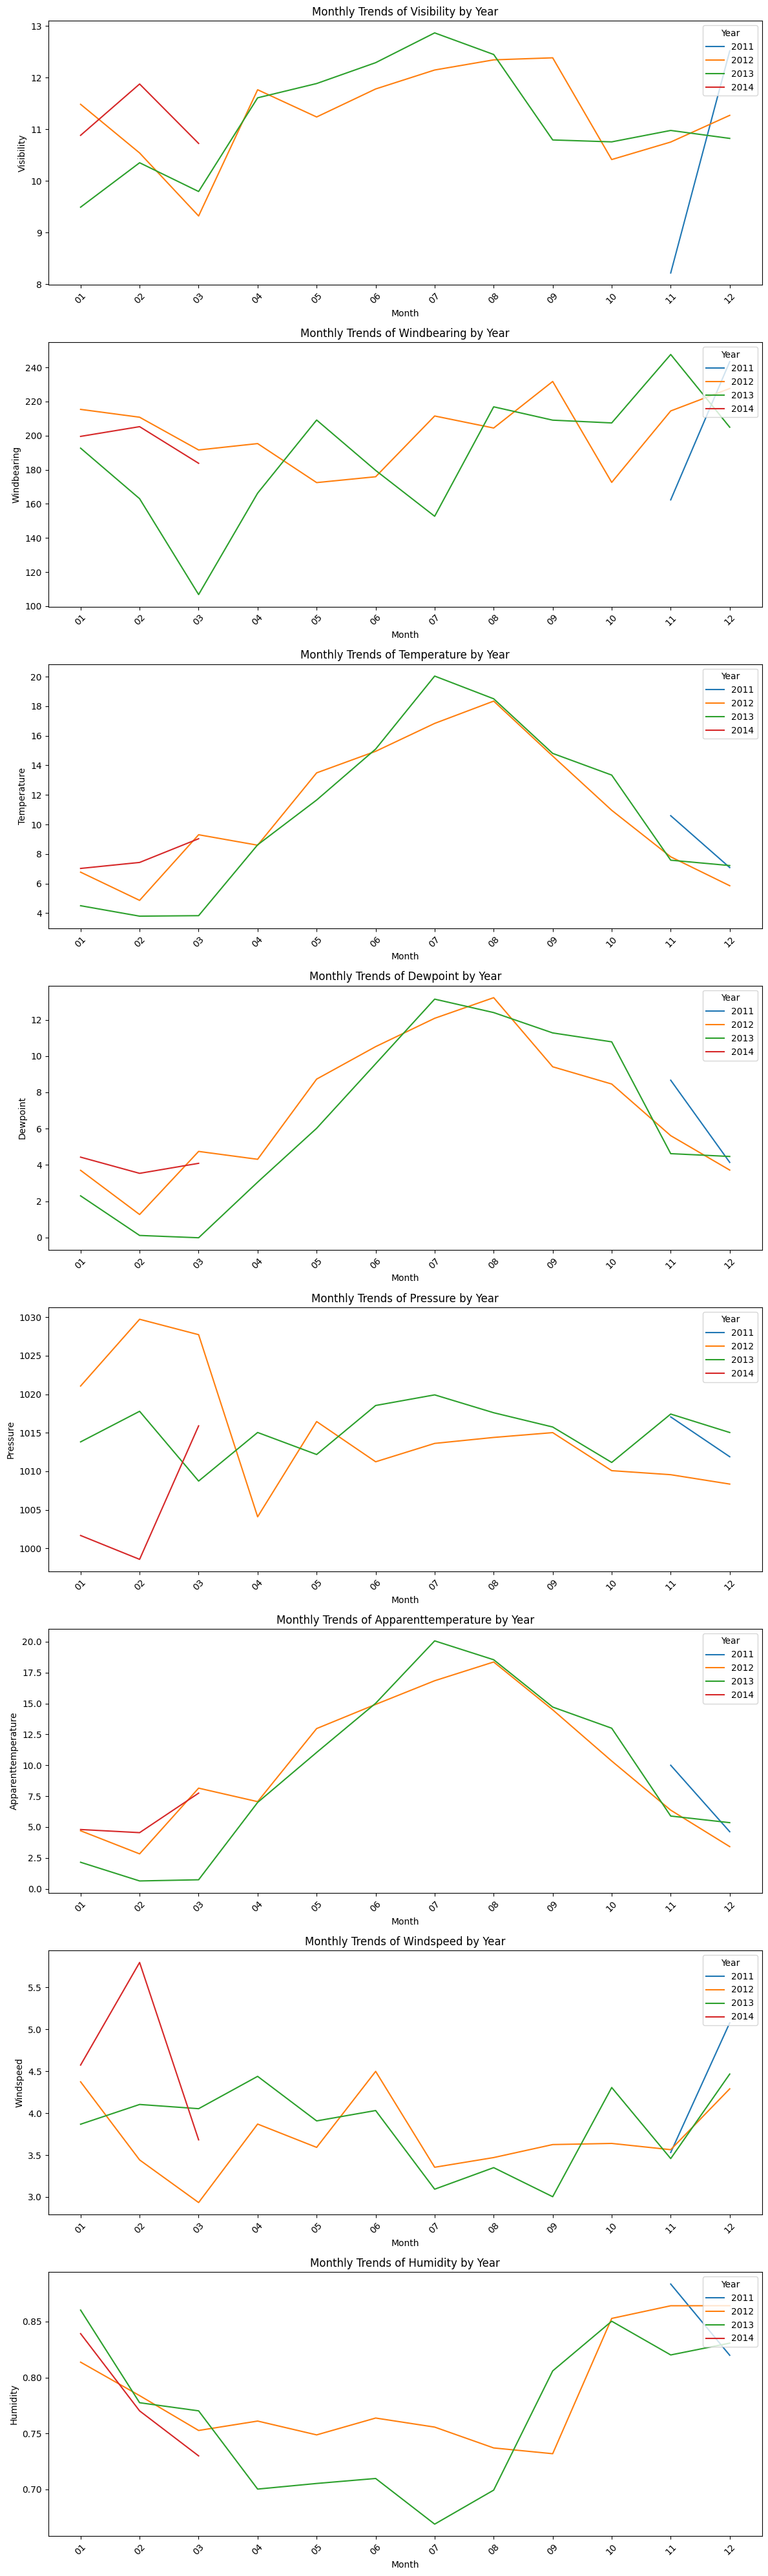

In [32]:
# List of columns to plot
interval_columns = ['visibility', 'windBearing', 'temperature', 'dewPoint', 'pressure', 'apparentTemperature', 'windSpeed', 'humidity']

# Prepare the DataFrame for plotting
weather_hourly['month_year'] = pd.to_datetime(weather_hourly[['year', 'month']].astype(str).agg('-'.join, axis=1), format='%Y-%m')
weather_hourly['month'] = weather_hourly['month'].astype(str).str.zfill(2)  # To ensure months are in '01' format

# Set up the plot grid for each interval category
fig, axes = plt.subplots(len(interval_columns), 1, figsize=(12, 5 * len(interval_columns)))

# Create a line plot for each interval column
for i, col in enumerate(interval_columns):
    # Group by year and month to get the mean value of the interval category
    monthly_data = weather_hourly.groupby(['month', 'year'])[col].mean().reset_index()
    
    # Set the color palette to distinguish years
    palette = sns.color_palette("tab10", n_colors=monthly_data['year'].nunique())
    
    # Plot the line plot for each year
    sns.lineplot(x='month', y=col, data=monthly_data, hue='year', palette=palette, ax=axes[i])

    # Set title and labels
    axes[i].set_title(f"Monthly Trends of {col.capitalize()} by Year")
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel(col.capitalize())
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].legend(title='Year', loc='upper right')

plt.tight_layout()
plt.show()



<h3>Monthly Seasonality - 2012</h3>

C:\Users\beast\AppData\Local\Temp\ipykernel_36828\1198696021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_2012['day_of_week'] = pd.to_datetime(weather_2012['date']).dt.day_name()
C:\Users\beast\AppData\Local\Temp\ipykernel_36828\1198696021.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_2012['month'] = weather_2012['month'].astype(str)  # Ensure month is treated as string
C:\Users\beast\AppData\Local\Temp\ipykernel_36828\1198696021.py:13: SettingWithCopyWarning: 
A value is tryin

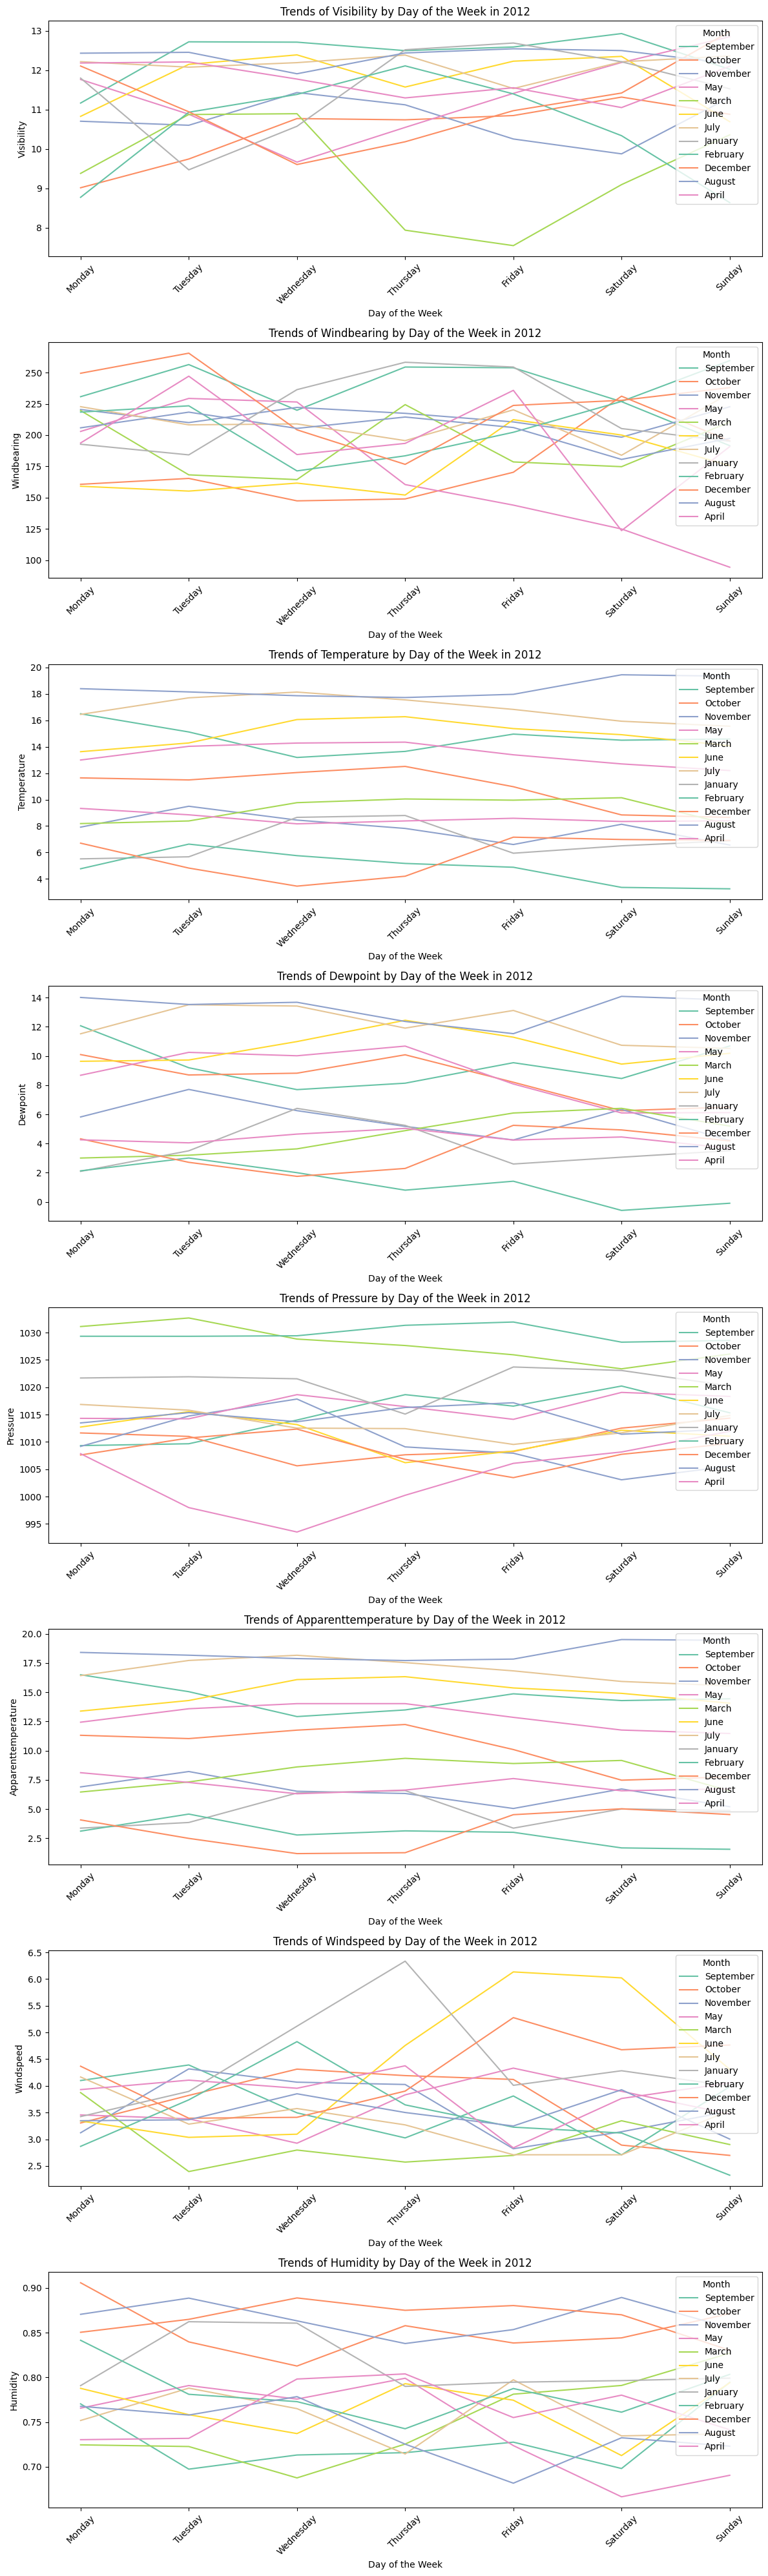

In [34]:
# Filter data for the year 2012
weather_2012 = weather_hourly[weather_hourly['year'] == 2012]

# Extract the full name of the day of the week
weather_2012['day_of_week'] = pd.to_datetime(weather_2012['date']).dt.day_name()

# List of columns to plot
interval_columns = ['visibility', 'windBearing', 'temperature', 'dewPoint', 'pressure', 'apparentTemperature', 'windSpeed', 'humidity']

weather_2012['month'] = weather_2012['month'].astype(str)  # Ensure month is treated as string

# Get the full name of the month
weather_2012['month'] = pd.to_datetime(weather_2012['month'], format='%m').dt.month_name()

# Set up the plot grid for each interval category
fig, axes = plt.subplots(len(interval_columns), 1, figsize=(12, 5 * len(interval_columns)))

# Create a line plot for each interval category
for i, col in enumerate(interval_columns):
    # Group the data by 'day_of_week' and 'month' and calculate the mean for each combination
    monthly_data = weather_2012.groupby(['day_of_week', 'month'])[col].mean().reset_index()
    
    # Sort by the days of the week to ensure they appear in the correct order
    ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    monthly_data['day_of_week'] = pd.Categorical(monthly_data['day_of_week'], categories=ordered_days, ordered=True)
    monthly_data = monthly_data.sort_values('day_of_week')

    # Set up the color palette with different colors for each month
    palette = sns.color_palette("Set2", n_colors=monthly_data['month'].nunique())

    # Plot the line chart for each month, color-coded by month
    sns.lineplot(x='day_of_week', y=col, data=monthly_data, hue='month', palette=palette, ax=axes[i])

    # Set title and labels
    axes[i].set_title(f"Trends of {col.capitalize()} by Day of the Week in 2012")
    axes[i].set_xlabel('Day of the Week')
    axes[i].set_ylabel(col.capitalize())
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].legend(title='Month', loc='upper right')

plt.tight_layout()
plt.show()



<h3>Monthly Seasonality - 2013</h3>

C:\Users\beast\AppData\Local\Temp\ipykernel_36828\94272476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_2012['day_of_week'] = pd.to_datetime(weather_2012['date']).dt.day_name()
C:\Users\beast\AppData\Local\Temp\ipykernel_36828\94272476.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_2012['month'] = weather_2012['month'].astype(str)  # Ensure month is treated as string
C:\Users\beast\AppData\Local\Temp\ipykernel_36828\94272476.py:13: SettingWithCopyWarning: 
A value is trying to b

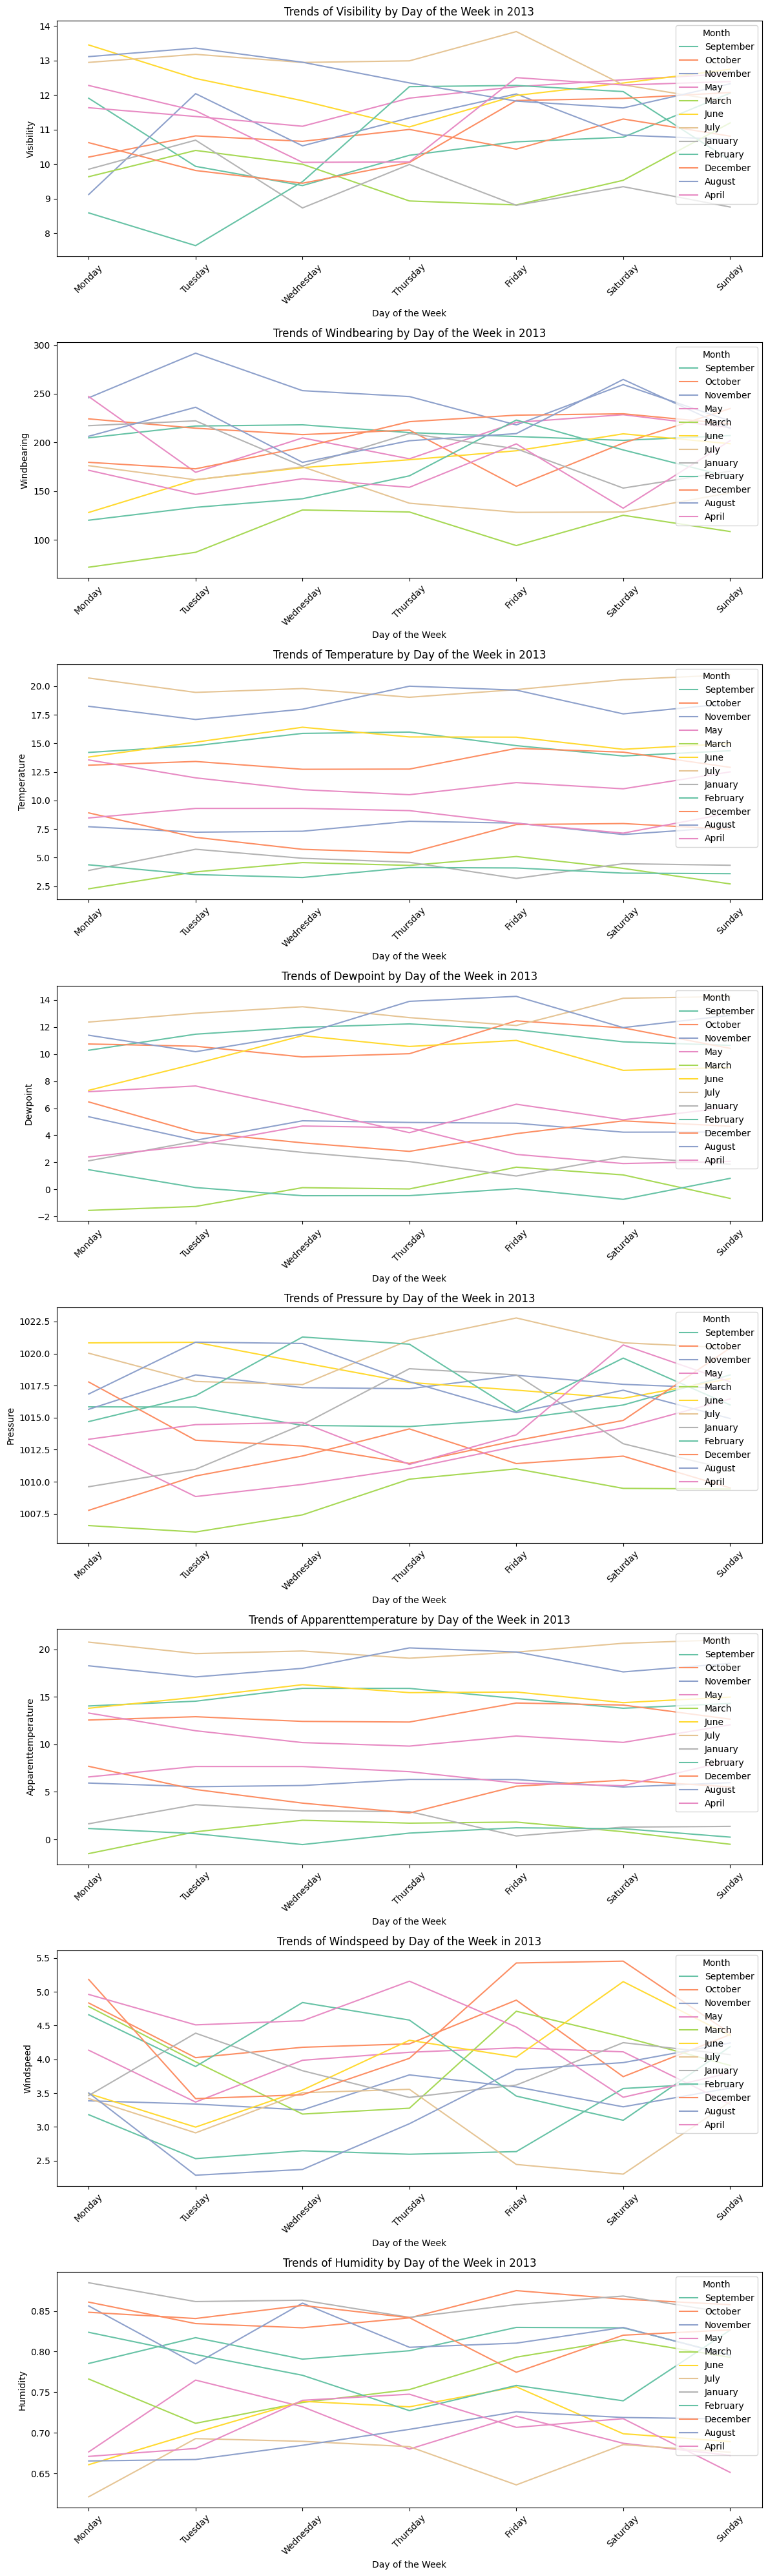

In [36]:
# Filter data for the year 2012
weather_2012 = weather_hourly[weather_hourly['year'] == 2013]

# Extract the full name of the day of the week
weather_2012['day_of_week'] = pd.to_datetime(weather_2012['date']).dt.day_name()

# List of columns to plot
interval_columns = ['visibility', 'windBearing', 'temperature', 'dewPoint', 'pressure', 'apparentTemperature', 'windSpeed', 'humidity']

weather_2012['month'] = weather_2012['month'].astype(str)  # Ensure month is treated as string

# Get the full name of the month
weather_2012['month'] = pd.to_datetime(weather_2012['month'], format='%m').dt.month_name()

# Set up the plot grid for each interval category
fig, axes = plt.subplots(len(interval_columns), 1, figsize=(12, 5 * len(interval_columns)))

# Create a line plot for each interval category
for i, col in enumerate(interval_columns):
    # Group the data by 'day_of_week' and 'month' and calculate the mean for each combination
    monthly_data = weather_2012.groupby(['day_of_week', 'month'])[col].mean().reset_index()
    
    # Sort by the days of the week to ensure they appear in the correct order
    ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    monthly_data['day_of_week'] = pd.Categorical(monthly_data['day_of_week'], categories=ordered_days, ordered=True)
    monthly_data = monthly_data.sort_values('day_of_week')

    # Set up the color palette with different colors for each month
    palette = sns.color_palette("Set2", n_colors=monthly_data['month'].nunique())

    # Plot the line chart for each month, color-coded by month
    sns.lineplot(x='day_of_week', y=col, data=monthly_data, hue='month', palette=palette, ax=axes[i])

    # Set title and labels
    axes[i].set_title(f"Trends of {col.capitalize()} by Day of the Week in 2013")
    axes[i].set_xlabel('Day of the Week')
    axes[i].set_ylabel(col.capitalize())
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].legend(title='Month', loc='upper right')

plt.tight_layout()
plt.show()



<h3>Month-Year Box Plot</h3>

C:\Users\beast\AppData\Local\Temp\ipykernel_36828\610476069.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\beast\AppData\Local\Temp\ipykernel_36828\610476069.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\beast\AppData\Local\Temp\ipykernel_36828\610476069.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\beast\AppData\Local\Temp\ipykernel_36828\610476069.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklab

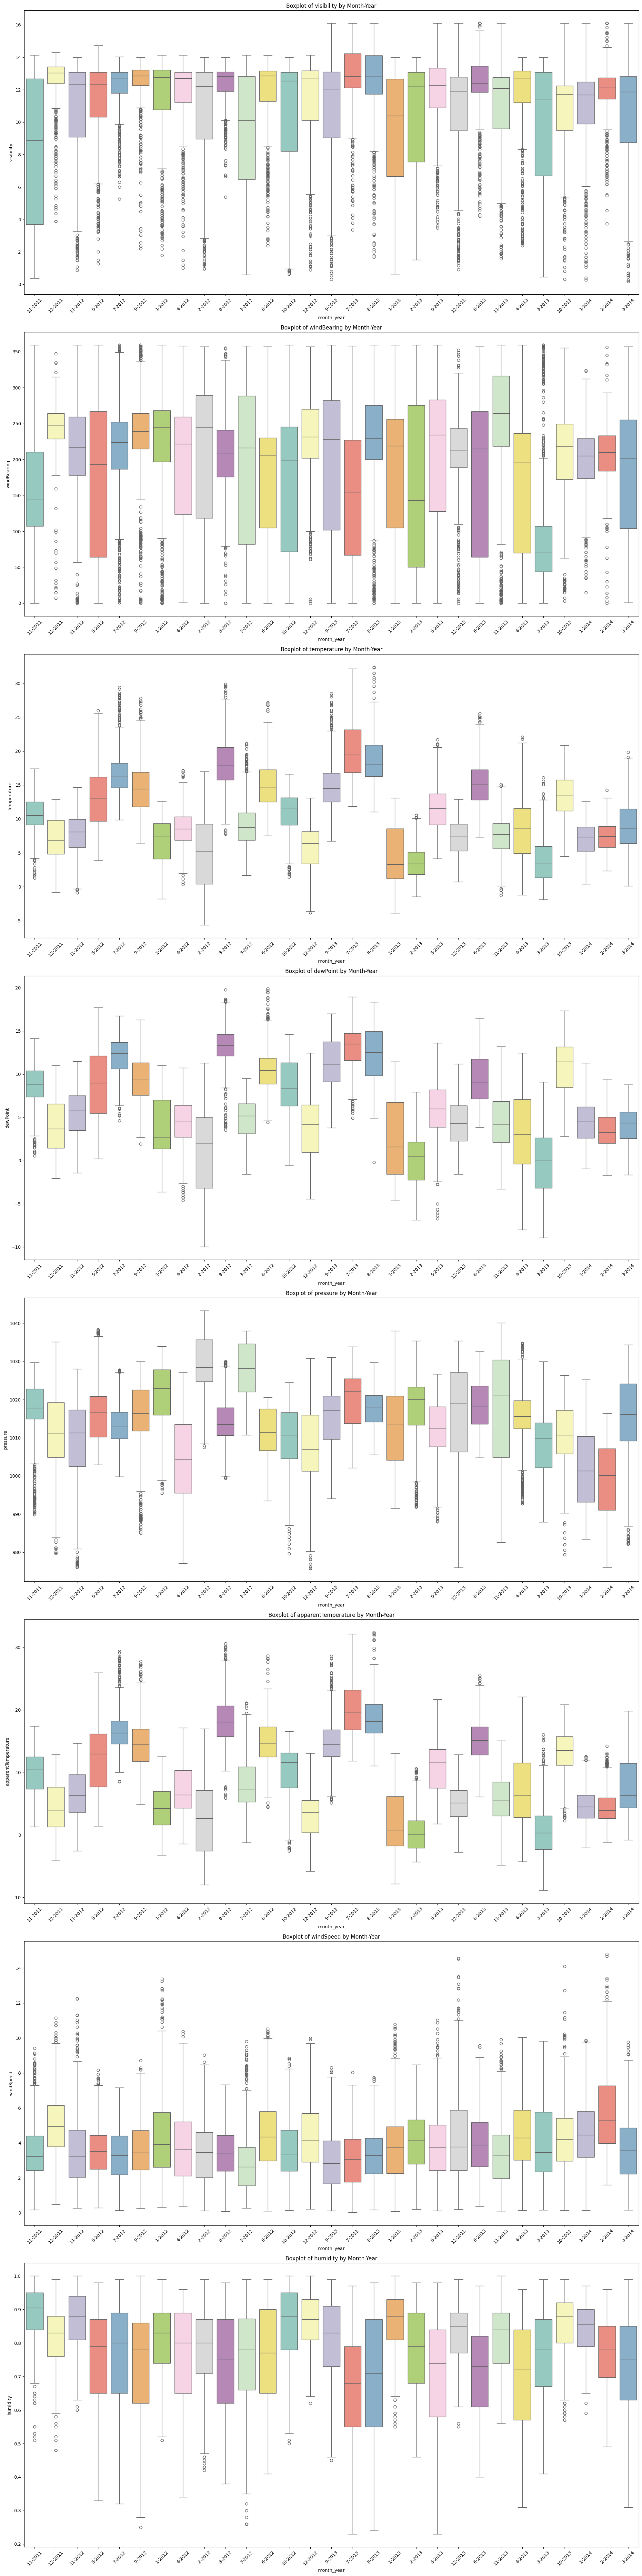

In [ ]:
weather_hourly['month_year'] = weather_hourly['month'].astype(str) + '-' + weather_hourly['year'].astype(str)

# List of columns to create boxplots for
interval_columns = ['visibility', 'windBearing', 'temperature', 'dewPoint', 'pressure', 'apparentTemperature', 'windSpeed', 'humidity']

# Set up the figure for subplots
fig, axes = plt.subplots(len(interval_columns), 1, figsize=(20, 10 * len(interval_columns)))

# Create a boxplot for each interval column
for i, col in enumerate(interval_columns):
    sns.boxplot(x='month_year', y=col, data=weather_hourly, ax=axes[i], hue='month_year', palette="Set3")
    axes[i].set_title(f"Boxplot of {col} by Month-Year")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


<b>Work on Daily data</b>